In [14]:
using Revise, Sqra, Plots
Sqra.CACHE!()

(true, true)

In [2]:
sim = Simulation(nsteps=10_000_000)
run(sim)

┌ Info: reading cache/sim_18164615234929798187.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:41


Simulation
  x0: Array{Float64}((6,)) [0.19920158482463968, 0.13789462153196408, -0.1709575705426315, 0.0784533378749835, 0.06778720715969005, -0.2112155752270007]
  epsilon: Int64 1
  r0: Float64 0.3333333333333333
  harm: Int64 1
  sigma: Float64 0.5
  dt: Float64 0.001
  nsteps: Int64 10000000
  maxdelta: Float64 0.1
  seed: Int64 1
  x: Array{Float64}((6, 10000000)) [0.20334321106184075 0.23323639105016725 … 0.061857877544676435 0.11390633113939738; 0.14416632237604463 0.10459139091170935 … -0.04035353858853223 -0.042598605124876586; … ; 0.053788009335393364 0.06679886031379578 … -0.022763912382464665 -0.010767213631356147; -0.20596632763897224 -0.19111568330233175 … 0.36841990153469534 0.3654551135298005]
  u: Array{Float64}((10000000,)) [-2.7899344658297394, -2.0767964628456994, -1.8682213972516182, -2.0773918396090956, -2.3579304739127185, -2.8050196206903886, -2.506948656244679, -2.465898421806273, -2.587451882125607, -2.5008280857245433  …  -2.5049017711498136, -2.536318710962

In [19]:
levels = 2:20

r = Vector(undef, length(levels))

for (i,l) in enumerate(levels)
	@show l
	s = Setup(sim=sim, level=l)
	r[i]= Experiment(s)
end

l = 2


┌ Info: reading cache/sim_18164615234929798187.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:41


  1.900170 seconds (706 allocations: 534.126 MiB, 57.00% gc time)
 12.676194 seconds (20.00 M allocations: 2.692 GiB, 1.65% gc time)
  0.079252 seconds (1.86 k allocations: 76.451 MiB)
  0.000272 seconds (1000 allocations: 55.953 KiB)
Committor residual mean: 0.0
  0.000125 seconds (114 allocations: 57.344 KiB)
l = 3


┌ Info: reading cache/sim_18164615234929798187.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:41


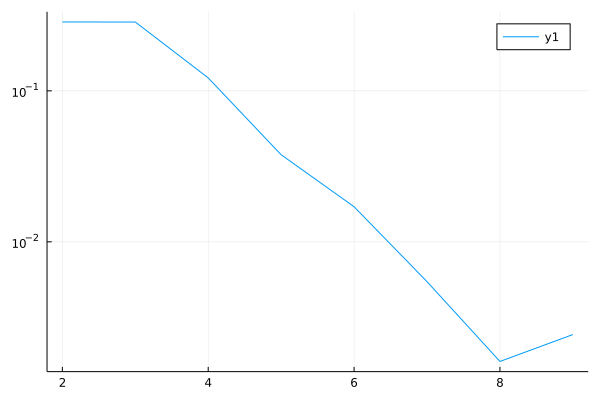

In [18]:
errs = Sqra.error.(r[[end]], r[1:end-1])

plot(levels[1:end-1], errs)
yaxis!(:log)